In [1]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
# Importing the dataset
dataset = pd.read_csv('Downloads\\cars.csv')
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [28]:
X = dataset.iloc[:,:-1].values


In [29]:
X = pd.DataFrame(X)
X = X.convert_objects(convert_numeric=True)
X.columns = ['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60', 'year']


C:\New folder\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [30]:
# Eliminating null values
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
    print(X[i].isnull().sum())
    

0
0
0
0
0
0
0


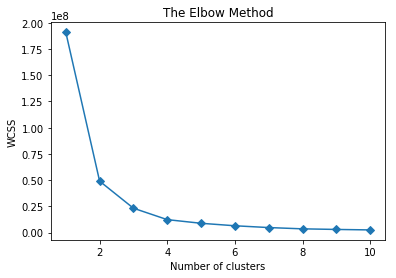

In [45]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss, marker='D')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)


In [35]:
y_kmeans

array([2, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 0,
       0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2,
       0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0,
       2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0])

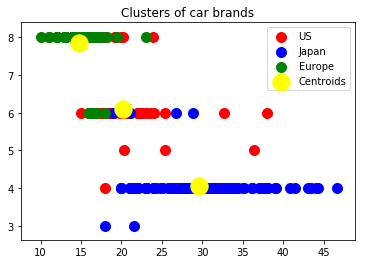

In [36]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='US')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='Japan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()